<a href="https://colab.research.google.com/github/DOMINION-JOHN1/Volatilty-index-price-prediction/blob/main/GoldPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
import yfinance as yf

In [2]:
stock_symbol = 'Gold'
start_date = '1985-01-01'
end_date = '2023-10-30'

# Fetch historical data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data=pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-02-13,0.000000,0.703125,0.625000,0.625000,0.414614,19680
1985-02-14,0.000000,0.703125,0.625000,0.625000,0.414614,65920
1985-02-15,0.000000,0.703125,0.625000,0.625000,0.414614,31360
1985-02-19,0.000000,0.625000,0.625000,0.625000,0.414614,9120
1985-02-20,0.000000,0.625000,0.625000,0.625000,0.414614,40000
...,...,...,...,...,...,...
2023-10-23,16.719999,16.860001,16.389999,16.549999,16.549999,19608900
2023-10-24,16.340000,16.590000,16.270000,16.559999,16.559999,12439800
2023-10-25,16.520000,16.870001,16.510000,16.580000,16.580000,20366300


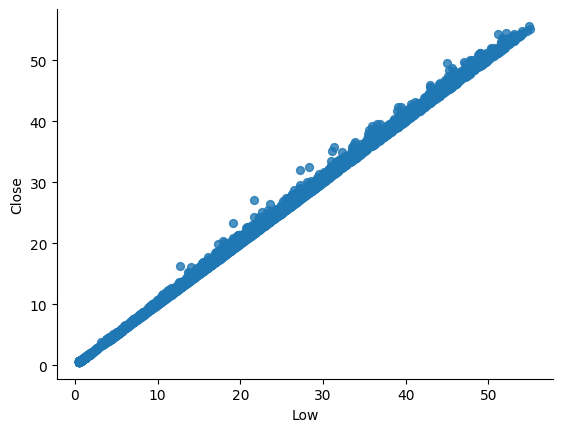

In [4]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# Convert the "Date" column to a datetime object
data.index = pd.to_datetime(data.index)

# Create a new column for the month of the year (as numbers)
data['Month_Num'] = data.index.month

# Create a new column for the day of the week (as numbers, where Monday is 0 and Sunday is 6)
data['Day_of_Week_Num'] = data.index.dayofweek

# Display the DataFrame with the new columns
data


,Open,High,Low,Close,Adj Close,Volume,Month_Num,Day_of_Week_Num
Date,,,,,,,,
1985-02-13,0.000000,0.703125,0.625000,0.625000,0.414614,19680,2,2
1985-02-14,0.000000,0.703125,0.625000,0.625000,0.414614,65920,2,3
1985-02-15,0.000000,0.703125,0.625000,0.625000,0.414614,31360,2,4
1985-02-19,0.000000,0.625000,0.625000,0.625000,0.414614,9120,2,1
1985-02-20,0.000000,0.625000,0.625000,0.625000,0.414614,40000,2,2
...,...,...,...,...,...,...,...,...
2023-10-23,16.719999,16.860001,16.389999,16.549999,16.549999,19608900,10,0
2023-10-24,16.340000,16.590000,16.270000,16.559999,16.559999,12439800,10,1
2023-10-25,16.520000,16.870001,16.510000,16.580000,16.580000,20366300,10,2


In [6]:
df = data.reset_index(drop=True).drop(columns=['Adj Close'])
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num
0,0.000000,0.703125,0.625000,0.625000,19680,2,2
1,0.000000,0.703125,0.625000,0.625000,65920,2,3
2,0.000000,0.703125,0.625000,0.625000,31360,2,4
3,0.000000,0.625000,0.625000,0.625000,9120,2,1
4,0.000000,0.625000,0.625000,0.625000,40000,2,2
...,...,...,...,...,...,...,...
9750,16.719999,16.860001,16.389999,16.549999,19608900,10,0
9751,16.340000,16.590000,16.270000,16.559999,12439800,10,1
9752,16.520000,16.870001,16.510000,16.580000,20366300,10,2
9753,16.549999,16.570000,16.100000,16.299999,23166400,10,3


In [7]:
df['Next Close'] = df['Close'].shift(-1)
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num,Next Close
0,0.000000,0.703125,0.625000,0.625000,19680,2,2,0.625000
1,0.000000,0.703125,0.625000,0.625000,65920,2,3,0.625000
2,0.000000,0.703125,0.625000,0.625000,31360,2,4,0.625000
3,0.000000,0.625000,0.625000,0.625000,9120,2,1,0.625000
4,0.000000,0.625000,0.625000,0.625000,40000,2,2,0.625000
...,...,...,...,...,...,...,...,...
9750,16.719999,16.860001,16.389999,16.549999,19608900,10,0,16.559999
9751,16.340000,16.590000,16.270000,16.559999,12439800,10,1,16.580000
9752,16.520000,16.870001,16.510000,16.580000,20366300,10,2,16.299999
9753,16.549999,16.570000,16.100000,16.299999,23166400,10,3,16.330000


In [8]:
 df.dropna(inplace=True)

In [9]:
x = df.drop(['Next Close'], axis=1)
y = df['Next Close']


In [10]:
scaler=RobustScaler()

In [11]:
X=scaler.fit_transform(x)

In [12]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Create a TimeSeriesSplit instance with 3 splits
tscv = TimeSeriesSplit(n_splits=6)

# Split the data
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    "Train:", X_train, y_train
    "Test:", X_test, y_test


In [13]:
X_train.shape

(8361, 7)

In [14]:
X_test.shape

(1393, 7)

In [15]:

X_train_reshaped = X_train.reshape(X_train.shape[0], 1, 7)  # Assuming 7 input features


X_test_reshaped = X_test.reshape(X_test.shape[0], 1, 7)  # Assuming 7 input features

X_test_reshaped.shape



(1393, 1, 7)

In [16]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 7), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use a different loss function depending on your problem

# Train the model
model.fit(X_train_reshaped, y_train, epochs=34, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model and make predictions
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")



Epoch 1/34
262/262 [==============================] - 24s 26ms/step - loss: 201.5487 - val_loss: 3.9673
Epoch 2/34
262/262 [==============================] - 5s 18ms/step - loss: 2.4168 - val_loss: 1.1630
Epoch 3/34
262/262 [==============================] - 4s 15ms/step - loss: 0.9462 - val_loss: 0.5256
Epoch 4/34
262/262 [==============================] - 5s 21ms/step - loss: 0.6465 - val_loss: 0.4323
Epoch 5/34
262/262 [==============================] - 4s 17ms/step - loss: 0.5577 - val_loss: 0.3127
Epoch 6/34
262/262 [==============================] - 4s 17ms/step - loss: 0.5003 - val_loss: 0.2961
Epoch 7/34
262/262 [==============================] - 6s 22ms/step - loss: 0.4750 - val_loss: 0.3573
Epoch 8/34
262/262 [==============================] - 4s 17ms/step - loss: 0.4743 - val_loss: 0.3126
Epoch 9/34
262/262 [==============================] - 6s 22ms/step - loss: 0.4298 - val_loss: 0.2733
Epoch 10/34
262/262 [==============================] - 4s 17ms/step - loss: 0.4531 - val

In [17]:
predictions= model.predict(X_test_reshaped)


44/44 [==============================] - 1s 3ms/step


In [18]:
np.array([y_test])

array([[13.26000023, 13.31999969, 13.17000008, ..., 16.57999992,
        16.29999924, 16.32999992]])

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mean_absolute_error(y_test[:-1], predictions[:-1])


0.36525128559134473

In [21]:
mean_squared_error(y_test[:-1], predictions[:-1])

0.26437877749105215

In [22]:
test= np.array([y_test])

In [23]:
pred=np.array(predictions)

In [24]:
y_test_1d = test.reshape(-1)

In [25]:
pred_1d = pred.reshape(-1)

In [26]:
new = pd.DataFrame({'True': y_test_1d, 'Prediction':pred_1d})
new['Date'] = np.arange(len(new))

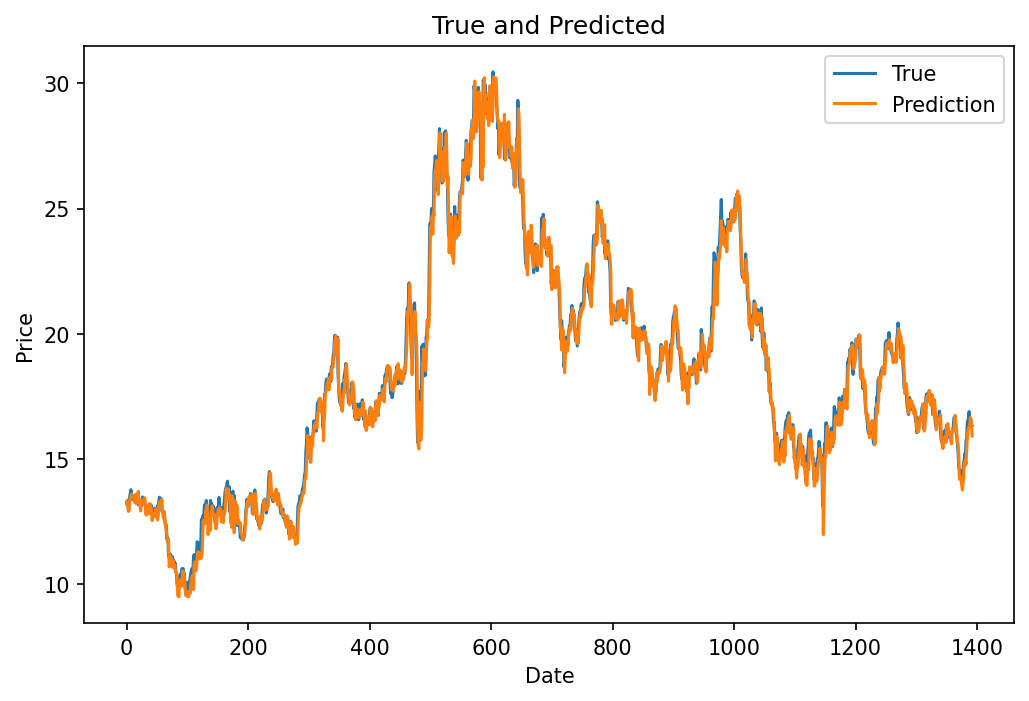

In [27]:
plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()


In [28]:
model.save('GOLDCLOSE.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
df['Next High'] = df['High'].shift(-1)
df['Next Low'] = df['Low'].shift(-1)
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num,Next Close,Next High,Next Low
0,0.000000,0.703125,0.625000,0.625000,19680,2,2,0.625000,0.703125,0.625000
1,0.000000,0.703125,0.625000,0.625000,65920,2,3,0.625000,0.703125,0.625000
2,0.000000,0.703125,0.625000,0.625000,31360,2,4,0.625000,0.625000,0.625000
3,0.000000,0.625000,0.625000,0.625000,9120,2,1,0.625000,0.625000,0.625000
4,0.000000,0.625000,0.625000,0.625000,40000,2,2,0.625000,0.625000,0.625000
...,...,...,...,...,...,...,...,...,...,...
9749,16.690001,17.139999,16.680000,16.889999,30130000,10,4,16.549999,16.860001,16.389999
9750,16.719999,16.860001,16.389999,16.549999,19608900,10,0,16.559999,16.590000,16.270000
9751,16.340000,16.590000,16.270000,16.559999,12439800,10,1,16.580000,16.870001,16.510000
9752,16.520000,16.870001,16.510000,16.580000,20366300,10,2,16.299999,16.570000,16.100000


In [30]:
df.dropna(inplace=True)
X = df.drop(['Next High', 'Next Close', 'Next Low'], axis=1)
y = df[['Next High', 'Next Low']]

In [31]:
scaler=RobustScaler()

In [32]:
X_scaled=scaler.fit_transform(X)

In [33]:
X_scaled.shape


(9753, 7)

In [34]:
y.shape

(9753, 2)

In [35]:
from sklearn.model_selection import train_test_split
split_index = int(len(X_scaled) * 0.8)

In [36]:
X_train = X_scaled [:split_index]
X_test = X_scaled[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [39]:
y_test.shape

(1951, 2)

In [37]:
X_train.shape

(7802, 7)

In [38]:

X_train_reshaped = X_train.reshape(X_train.shape[0], 1, 7)  # Assuming 7 input features


X_test_reshaped = X_test.reshape(X_test.shape[0], 1, 7)  # Assuming 7 input features

X_test_reshaped.shape



(1951, 1, 7)

In [51]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 7), activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(2))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use a different loss function depending on your problem

# Train the model
model.fit(X_train_reshaped, y_train, epochs=34, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model and make predictions
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")



Epoch 1/34
244/244 [==============================] - 11s 18ms/step - loss: 178.9686 - val_loss: 5.3619
Epoch 2/34
244/244 [==============================] - 6s 23ms/step - loss: 2.3943 - val_loss: 1.7817
Epoch 3/34
244/244 [==============================] - 5s 22ms/step - loss: 0.8559 - val_loss: 0.7575
Epoch 4/34
244/244 [==============================] - 4s 17ms/step - loss: 0.5030 - val_loss: 0.4062
Epoch 5/34
244/244 [==============================] - 5s 22ms/step - loss: 0.3922 - val_loss: 0.3853
Epoch 6/34
244/244 [==============================] - 4s 17ms/step - loss: 0.3472 - val_loss: 0.2701
Epoch 7/34
244/244 [==============================] - 6s 23ms/step - loss: 0.3560 - val_loss: 0.2544
Epoch 8/34
244/244 [==============================] - 4s 17ms/step - loss: 0.3380 - val_loss: 0.2346
Epoch 9/34
244/244 [==============================] - 4s 17ms/step - loss: 0.3474 - val_loss: 0.2049
Epoch 10/34
244/244 [==============================] - 7s 27ms/step - loss: 0.2996 - val

In [52]:
predictions= model.predict(X_test_reshaped)


61/61 [==============================] - 1s 3ms/step


In [53]:
np.array([y_test])

array([[[ 9.93999958,  9.30000019],
        [ 9.94999981,  9.5       ],
        [10.30000019,  9.88000011],
        ...,
        [16.59000015, 16.27000046],
        [16.87000084, 16.51000023],
        [16.56999969, 16.10000038]]])

In [62]:
predictions

array([[10.175708,  9.623905],
       [10.081009,  9.568216],
       [10.263841,  9.800671],
       ...,
       [17.124538, 16.424099],
       [16.933144, 16.288647],
       [17.0497  , 16.34488 ]], dtype=float32)

In [54]:
mean_absolute_error(y_test[:-1], predictions[:-1])


0.29809607016734585

In [55]:
test= np.array([y_test])

In [56]:
pred=np.array(predictions)

In [57]:
y_test_1d = test.reshape(-1)

In [58]:
pred_1d = pred.reshape(-1)

In [59]:
new = pd.DataFrame({'True': y_test_1d, 'Prediction':pred_1d})
new['Date'] = np.arange(len(new))

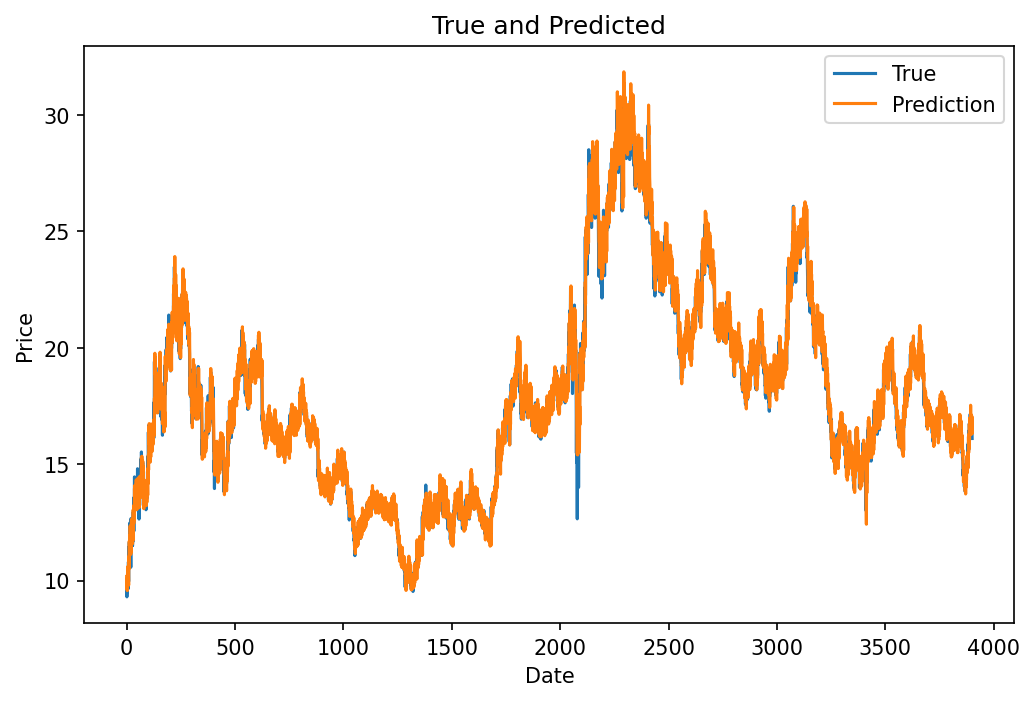

In [60]:
plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()


In [61]:
model.save('GOLDH&L.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
